In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [36]:
images = []
labels = []
folder_a = "UrbanImage"
folder_names = os.listdir(folder_a)

In [37]:
for folder_name in folder_names:
    folder_path = os.path.join(folder_a, folder_name)
    
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        with Image.open(image_path) as image:
            npImage = np.array(image)
            images.append(npImage)
            labels.append(int(folder_name))


In [39]:
X = np.array(images)
X = X / 255.0
y = np.array(labels)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 50176)            

In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
183/183 [==============================] - 22s 114ms/step - loss: 1.6293 - accuracy: 0.4147 - val_loss: 1.0207 - val_accuracy: 0.6641
Epoch 2/10
183/183 [==============================] - 20s 110ms/step - loss: 1.0837 - accuracy: 0.6299 - val_loss: 0.7741 - val_accuracy: 0.7477
Epoch 3/10
183/183 [==============================] - 20s 112ms/step - loss: 0.8585 - accuracy: 0.7171 - val_loss: 0.6362 - val_accuracy: 0.8019
Epoch 4/10
183/183 [==============================] - 20s 110ms/step - loss: 0.6778 - accuracy: 0.7733 - val_loss: 0.5543 - val_accuracy: 0.8324
Epoch 5/10
183/183 [==============================] - 20s 110ms/step - loss: 0.5426 - accuracy: 0.8108 - val_loss: 0.4880 - val_accuracy: 0.8428
Epoch 6/10
183/183 [==============================] - 21s 113ms/step - loss: 0.4306 - accuracy: 0.8480 - val_loss: 0.4606 - val_accuracy: 0.8664
Epoch 7/10
183/183 [==============================] - 20s 111ms/step - loss: 0.3717 - accuracy: 0.8672 - val_loss: 0.5025 - val_ac

91/91 - 2s - loss: 0.5314 - accuracy: 0.8713 - 2s/epoch - 25ms/step


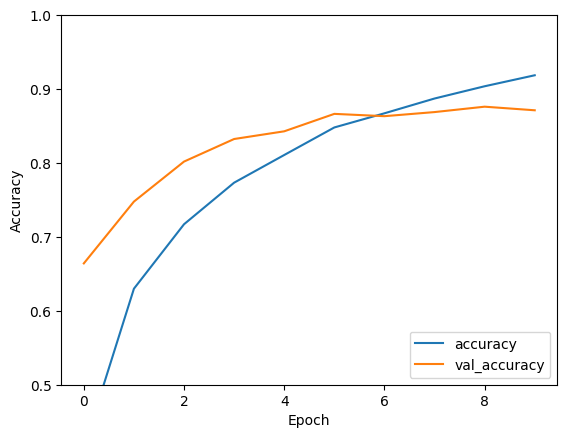

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [51]:
print(test_acc)

0.871269941329956


In [55]:
model.save('my_model.keras')

In [56]:
loaded_model = tf.keras.models.load_model('my_model.keras')